## HYCOM Data
#### Take vertical slice of salinity data along CalCOFI line 90
"expt_93.0.nc4" contains salinity data from 3/25/2020 around CalCOFI line 90

In [1]:
import os
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats
import netCDF4 as netcdf

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

#### CalCOFI Station Data

In [19]:
# import CalCOFI stations
calcofi_stn_DF = pd.read_csv("CalCOFIStationOrder.csv")
calcofi90_stn_DF = calcofi_stn_DF[calcofi_stn_DF['Line ']==90]
lat90 = calcofi90_stn_DF['Station Dlatitude '].values
lon90 = calcofi90_stn_DF['Dlongitude '].values

In [24]:
lat90

array([30.41795, 30.75128, 31.08462, 31.41795, 31.75128, 32.08462,
       32.41795, 32.65128, 32.91795, 33.18462, 33.25128, 33.41795,
       33.48462, 33.49462])

#### NetCDF Data

In [89]:
netcdf_data = netcdf.Dataset("expt_93.0.nc4")

netcdf_data.variables.keys()
salinity = netcdf_data.variables['salinity'][:].data
times = netcdf_data.variables['time'][:].data
depth = netcdf_data.variables['depth'][:].data
lats = netcdf_data.variables['lat'][:].data
lons = netcdf_data.variables['lon'][:].data


In [44]:
salinity[0,1].shape # salinity: 1 time, 40 depths, 101 lats, 101 lons
#times.shape
#depth.shape
#lats.shape
#lons.shape
#depth # meters; 0, 2, 4, ..., 3000, 4000, 5000

(101, 101)

In [81]:
netcdf_DF = pd.DataFrame(data = salinity[0,1])
netcdf_DF.describe()

,0
count,101.000000
mean,33.361973
std,0.092593
min,33.180000
25%,33.291000
50%,33.360001
75%,33.455002
max,33.546001


In [102]:
xvalues = lons
yvalues = lats
xx, yy = np.meshgrid(xvalues, yvalues)
#print(xvalues)
#xx
# No need for meshgrid here

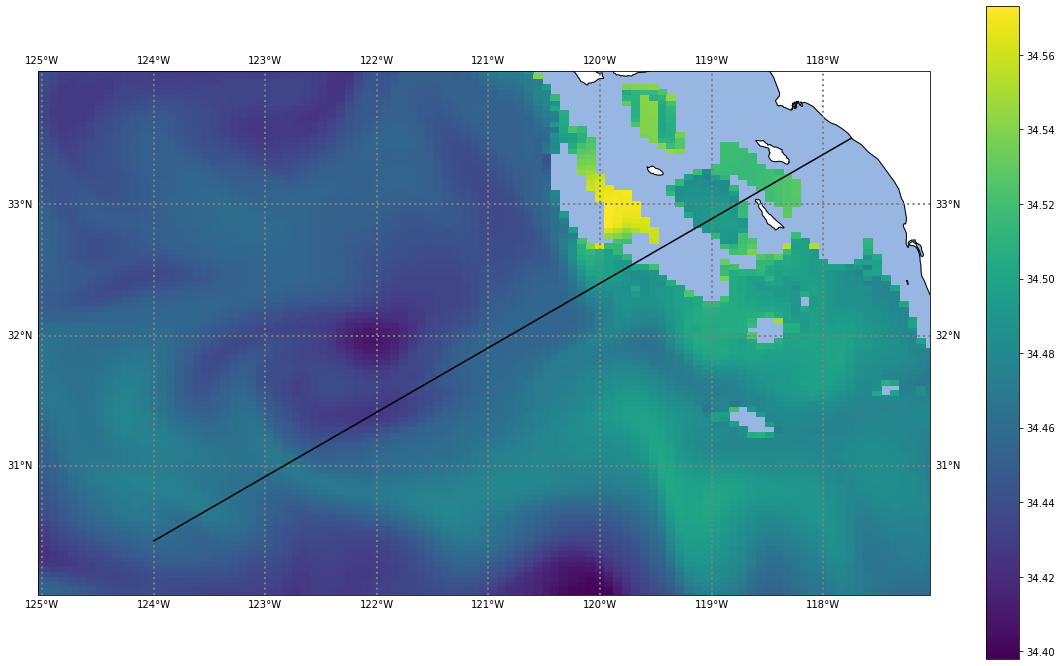

In [105]:
var = netcdf_data.variables['salinity'][0,32] # salinity at depth index 32; 1000 m 

proj = ccrs.Mercator()
fig = plt.figure(figsize = (20, 12), frameon = True);
ax = plt.axes(projection = proj)
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])

gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
ax.add_feature(OCEAN);
ax.coastlines();

cm = ax.pcolormesh(xx,yy,var,transform = ccrs.PlateCarree());
plt.colorbar(cm);

plt.plot(lon90, lat90, 'k-', transform = ccrs.PlateCarree());